In [23]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten

In [2]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 14s 1us/step


In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

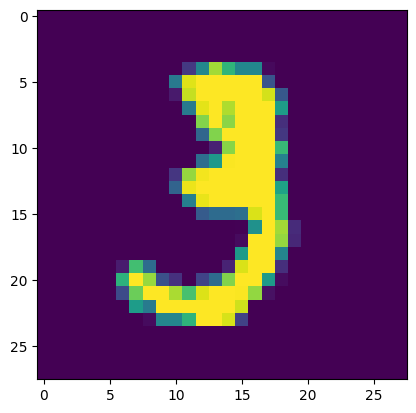

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_train[10])

In [11]:
X_train = X_train/255
X_test=X_test/255

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
from keras import activations

In [25]:
model=Sequential()
model.add(Input(shape=(28,28)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='sigmoid'))
# input_shape=(28,28

In [26]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [28]:
history=model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9189 - loss: 0.2842 - val_accuracy: 0.9536 - val_loss: 0.1557
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9643 - loss: 0.1186 - val_accuracy: 0.9644 - val_loss: 0.1228
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9755 - loss: 0.0810 - val_accuracy: 0.9671 - val_loss: 0.1131
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9814 - loss: 0.0598 - val_accuracy: 0.9718 - val_loss: 0.0954
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9853 - loss: 0.0460 - val_accuracy: 0.9717 - val_loss: 0.0946
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9876 - loss: 0.0382 - val_accuracy: 0.9733 - val_loss: 0.0980
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9906 - loss: 0.0299 - val_accuracy: 0.9693 - val_loss: 0.1135
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9912 - loss: 0

In [29]:
y_prob=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step


In [30]:
y_pred=y_prob.argmax(axis=1)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.953

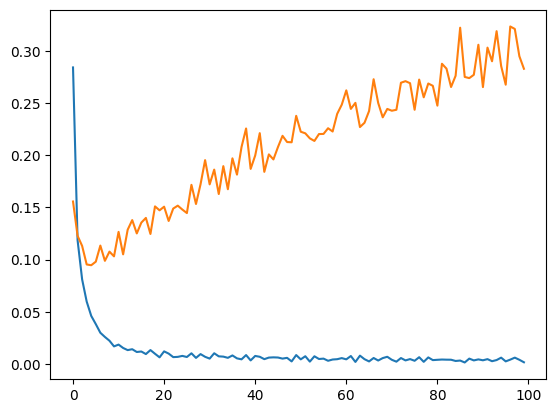

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

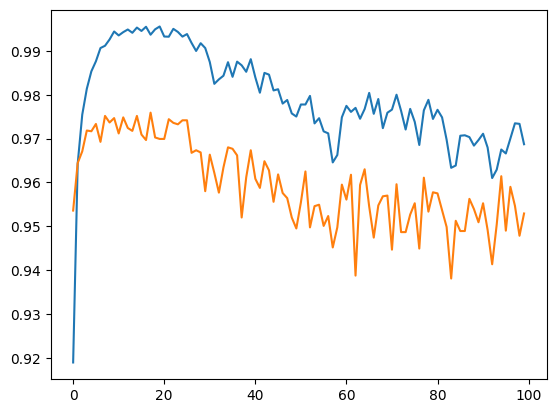

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

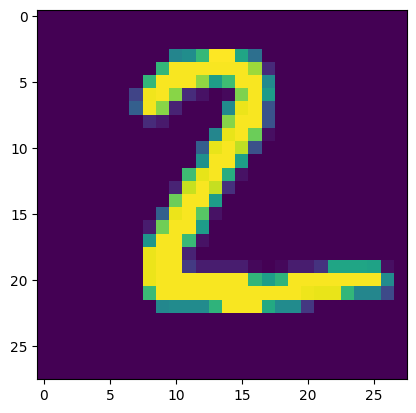

In [34]:
plt.imshow(X_test[1])

In [36]:
model.predict(X_test[3].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([0])

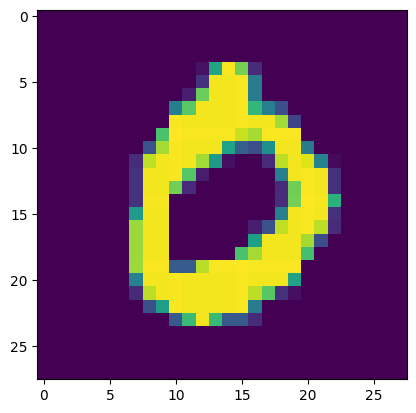

In [38]:
plt.imshow(X_test[3])